### All References -

1. one-hot-encoding explanation: https://www.machinecurve.com/index.php/2020/11/24/one-hot-encoding-for-machine-learning-with-tensorflow-and-keras/
2. importing mnist data in tensorflow: https://medium.com/the-data-science-publication/how-to-import-the-mnist-dataset-using-tensorflow-a972322991a6

### Import the required libraries -

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os


print("Imported libraries!")

Imported libraries!


### Prepare the data -

0.   Import the MNIST data from tensorflow.
1.   Normalization: Make all images grayscale to improve speed.
2.   Reshape: Reshape all images to 28x28x1 3D matrices.
3.   Encode Labels: Encode the labels to one-hot-encoded vectors
(one-hot-encoding reference: https://www.machinecurve.com/index.php/2020/11/24/one-hot-encoding-for-machine-learning-with-tensorflow-and-keras/)



trainX normalized: (60000, 28, 28, 1)
valX normalized: (10000, 28, 28, 1)

Reshape:
# trainX reshaped: (60000, 28, 28, 1) => (60000, 28, 28, 1)
# valX reshaped: (10000, 28, 28, 1) => (10000, 28, 28, 1)

Encode Labels:
# trainY encoded: (60000, 10)

trainX shape: (60000, 28, 28, 1)
valX shape: (10000, 28, 28, 1)
trainY shape: (60000, 10)
valY shape: (10000,)


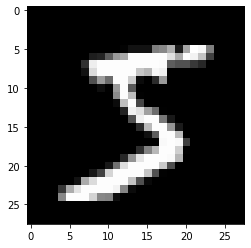

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Import MNIST dataset
(trainX, trainY), (valX, valY) = mnist.load_data()

# Normalization
trainX, valX = trainX[..., np.newaxis]/255.0, valX[..., np.newaxis]/255.0
print(f"trainX normalized: {trainX.shape}")
print(f"valX normalized: {valX.shape}\n")

# Reshape
print("Reshape:")
trainXOld = trainX.copy()
trainX = trainX.reshape(-1, 28, 28, 1)
print(f"# trainX reshaped: {trainXOld.shape} => {trainX.shape}")
valXOld = valX.copy()
valX = valX.reshape(-1, 28, 28, 1)
print(f"# valX reshaped: {valXOld.shape} => {valX.shape}\n")

# Encode Labels
# I am utilizing the keras integration from tensorflow instead of the keras library as shown in the CNN tutorial from the curriculum
from tensorflow.keras.utils import to_categorical

print("Encode Labels:")
trainY = to_categorical(trainY, num_classes=10)
print(f"# trainY encoded: {trainY.shape}\n")


# Display example data as a plot
print(f"trainX shape: {trainX.shape}")
print(f"valX shape: {valX.shape}")
print(f"trainY shape: {trainY.shape}")
print(f"valY shape: {valY.shape}")
plt.imshow(trainX[0,:,:,0], cmap='gray')
plt.show()

### Split the dataset into training/testing -

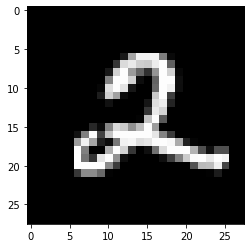

In [39]:
from sklearn.model_selection import train_test_split
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size = 0.1, random_state=2)

# Display example data as a plot
plt.imshow(trainX[5][:,:,0], cmap='gray')
plt.show()

### Create the CNN model -

In [40]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create the model base
cnnModel = Sequential()
# Add the layers
cnnModel.add(Conv2D(filters = 8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
cnnModel.add(MaxPool2D(pool_size=(2,2)))
cnnModel.add(Dropout(0.25))
cnnModel.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
cnnModel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnnModel.add(Dropout(0.25))

cnnModel.add(Flatten())
cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dropout(0.5))
cnnModel.add(Dense(10, activation='softmax'))

# Set the optimizer
cnnOptimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
cnnModel.compile(optimizer=cnnOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
cnnModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)              

### Fit the model -

In [41]:
# Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(trainX)

# Fit the model
cnnHistory = cnnModel.fit_generator(datagen.flow(trainX, trainY, batch_size=250), epochs=10, validation_data=(valX, valY), steps_per_epoch=trainX.shape[0] // 250)


Epoch 1/10
157/157 [==============================] - 16s 57ms/step - loss: 1.5782 - accuracy: 0.4561 - val_loss: 0.2422 - val_accuracy: 0.9355
Epoch 2/10
157/157 [==============================] - 9s 59ms/step - loss: 0.5045 - accuracy: 0.8404 - val_loss: 0.1355 - val_accuracy: 0.9611
Epoch 3/10
157/157 [==============================] - 9s 57ms/step - loss: 0.3586 - accuracy: 0.8872 - val_loss: 0.1135 - val_accuracy: 0.9701
Epoch 4/10
157/157 [==============================] - 9s 56ms/step - loss: 0.2879 - accuracy: 0.9110 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 5/10
157/157 [==============================] - 9s 56ms/step - loss: 0.2572 - accuracy: 0.9205 - val_loss: 0.0825 - val_accuracy: 0.9778
Epoch 6/10
157/157 [==============================] - 9s 55ms/step - loss: 0.2334 - accuracy: 0.9291 - val_loss: 0.0709 - val_accuracy: 0.9801
Epoch 7/10
157/157 [==============================] - 9s 57ms/step - loss: 0.2033 - accuracy: 0.9344 - val_loss: 0.0672 - val_accuracy: 0.980

### Visualize the model -

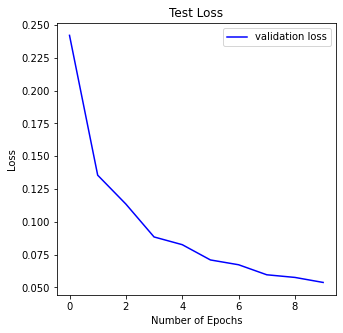

In [42]:
plt.figure(figsize=(5,5))
plt.plot(cnnHistory.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualize the Confusion Matrix -

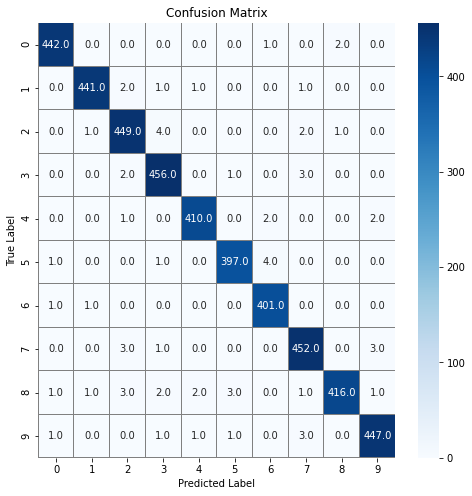

In [43]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
predictY = cnnModel.predict(valX)
# Convert predictions classes to one hot vectors 
predictYClasses = np.argmax(predictY,axis = 1) 
# Convert validation observations to one hot vectors
trueY = np.argmax(valY,axis = 1) 
# compute the confusion matrix
confusionMatrix = confusion_matrix(trueY, predictYClasses) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()